In [1]:
import numpy as np
import h5py


fn = "image1-competition.hdf5"

with h5py.File(fn, "r") as f:
    data = np.array(f["data"])
    wns = np.array(f["wns"])
    tissue_mask = np.array(f["tissue_mask"])
    classes = np.array(f["classes"])

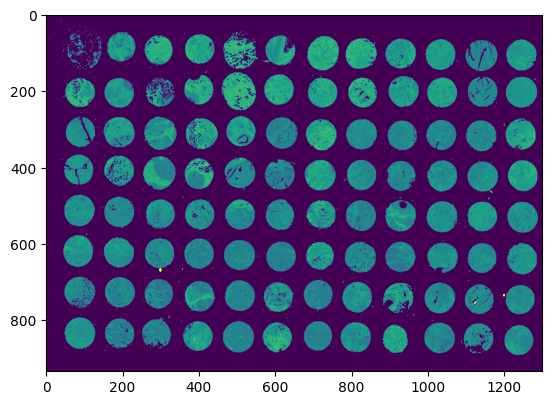

In [2]:
# display the whole image

import matplotlib.pyplot as plt

def nearest_ind(a, v):
    return np.abs(a - v).argmin()

im = data[:, :, nearest_ind(wns, 1560)]
plot = plt.imshow(im, vmin=0, vmax=1)

In [3]:
data_predict = data[265:465,360:660]

In [43]:
from nn import ANNClassification, ReLU_Activation, LeakyReLU_Activation

model = ANNClassification(units=[50, 50, 50], n_iter=1000, verbose=True, decay=0.9995, lambda_=1e-5)

In [44]:
from sklearn.neural_network import MLPClassifier

# model = MLPClassifier(hidden_layer_sizes=(100, 100), activation="logistic", max_iter=20, verbose=True, learning_rate_init=1, alpha=1e-5, learning_rate='adaptive', early_stopping=True, validation_fraction=0.01, solver="sgd")

In [45]:
annotated_sel = classes != -1
X = data[annotated_sel]
y = classes[annotated_sel]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

Adddata  augmentation to enable using bigger models

In [46]:
model.fit(X, y)

[187, 50, 50, 50, 6]
Iteration: 0
Accuracy: 0.1868
Loss: 2.3016
0.9995

Iteration: 100
Accuracy: 0.5267
Loss: 1.2403
0.9507419214772129

Iteration: 200
Accuracy: 0.7727
Loss: 0.6979
0.9043623824454068

Iteration: 300
Accuracy: 0.8135
Loss: 0.5400
0.8602453518737936

Iteration: 400
Accuracy: 0.8277
Loss: 0.4762
0.8182804590118382

Iteration: 500
Accuracy: 0.8397
Loss: 0.4330
0.7783627172668048

Iteration: 600
Accuracy: 0.8529
Loss: 0.3987
0.7403922615512425

Iteration: 700
Accuracy: 0.8652
Loss: 0.3708
0.7042740984433092

Iteration: 800
Accuracy: 0.8763
Loss: 0.3473
0.6699178685348912

Iteration: 900
Accuracy: 0.8858
Loss: 0.3266
0.6372376203729679

Accuracy: 0.8950
Loss: 0.3100


In [47]:
model.layers[0].weights

array([[-7.15874176e-02, -7.26953029e-02, -2.51012642e-02, ...,
        -2.83805492e-02,  3.76539271e-02, -3.53861025e-02],
       [ 1.16496087e-01,  1.44770161e-01, -1.02671763e-01, ...,
        -9.31386241e-02, -7.90882926e-02,  3.53434225e-02],
       [ 4.91043730e-02, -1.23716967e-02, -6.46043315e-02, ...,
        -3.48235798e-02, -1.95464642e-02,  3.58277480e-02],
       ...,
       [-1.54870350e-03,  2.22039799e-01, -2.90371909e-02, ...,
         1.02662902e-01,  6.61607607e-02, -6.14272581e-02],
       [-1.35543470e-01, -8.12747143e-02,  5.47264173e-02, ...,
         9.17720021e-02, -3.51990373e-02, -3.50132982e-02],
       [-1.80915841e-02, -4.89291417e-03, -2.54148731e-02, ...,
        -1.17023532e-01, -1.23315727e-02,  9.69040439e-05]])

In [48]:
lin_data_predict = data_predict.reshape(-1, data_predict.shape[-1])
lin_data_predict = scaler.transform(lin_data_predict)

predictions = model.predict(lin_data_predict)

c:\Users\sebas\one\OneDrive\grive\faks\masters\y1\2nd semester\ML-DS I\ML-DS-I\hw4 - neural nets\nn.py:68: RuntimeWarning: overflow encountered in exp
  self.output = 1 / (1 + np.exp(-1 * inputs))


In [49]:
predictions

array([[3.18134745e-02, 2.17026030e-01, 2.17983321e-01, 1.47560469e-01,
        3.85391144e-01, 2.25561423e-04],
       [3.18134745e-02, 2.17026030e-01, 2.17983321e-01, 1.47560469e-01,
        3.85391144e-01, 2.25561423e-04],
       [3.18134745e-02, 2.17026030e-01, 2.17983321e-01, 1.47560469e-01,
        3.85391144e-01, 2.25561423e-04],
       ...,
       [3.18134745e-02, 2.17026030e-01, 2.17983321e-01, 1.47560469e-01,
        3.85391144e-01, 2.25561423e-04],
       [3.18134745e-02, 2.17026030e-01, 2.17983321e-01, 1.47560469e-01,
        3.85391144e-01, 2.25561423e-04],
       [3.18134745e-02, 2.17026030e-01, 2.17983321e-01, 1.47560469e-01,
        3.85391144e-01, 2.25561423e-04]])

In [50]:
predictions = predictions.reshape((200,300,6))

In [51]:
predictions.shape

(200, 300, 6)

In [52]:

with open("ANN_50.npy", "wb") as f:
    np.save(f, predictions.astype(np.float32))

In [53]:
annotated_sel = classes != -1
X = wns[annotated_sel]
y = classes[annotated_sel]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
X_test = wns[~annotated_sel]